**Prevendo valores de imóveis** 📈

Na aula de hoje, vamos explorar um dataset que contém algumas características sobre imóveis, tais como area, andar, suites, vista, e entre outros atributos.

Nosso desafio de hoje será tentar encontrar uma forma de criar um algortimo preditivo que utilize essas características para predizer o valor do imóvel, será que é possível?

**Atributos:**

* Ordem: Coluna de ID.
* Valor: Valor do imóvel.
* Area: Tamanho da área do imóvel.
* IA: Idade do imóvel.
* Andar: Quantidade de andares.
* Suites: Quantidade de suítes.
* Vista: Se o imóvel possúi uma boa vista ou não.
* DistBM: Distancia do Imovel do Mar.
* SemRuido: Se o imóvel é localizado em uma região calma ou não.
* AV100m: DistPróximo à área verde.

Vamos começar a trabalhar com os dados!

In [36]:
# importanto as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
dados_path = './Valorizacao_Ambiental.csv'

dados = pd.read_csv(dados_path, sep=';')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [8]:
dados.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [9]:
dados.shape

(172, 10)

In [11]:
dados.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [13]:
dados.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


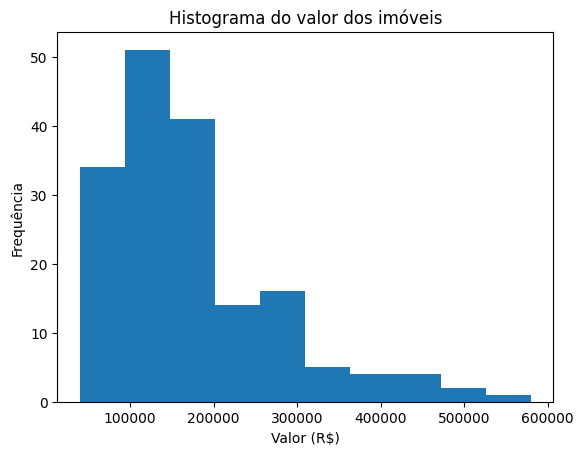

In [15]:
plt.hist(dados.Valor, bins=10)

plt.xlabel('Valor (R$)')
plt.ylabel('Frequência')
plt.title('Histograma do valor dos imóveis')

plt.show()

Vamos transformar a variável valor em forma de raiz para reduzir a variância

In [16]:
dados['raiz_valor'] = np.sqrt(dados.Valor)

dados

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131
...,...,...,...,...,...,...,...,...,...,...,...
167,168,80000,82,14,2,0,0,485,1,0,282.842712
168,169,144000,134,11,2,0,1,827,1,1,379.473319
169,170,176000,135,9,3,2,1,414,1,1,419.523539
170,171,199956,141,1,6,2,0,305,0,0,447.164399


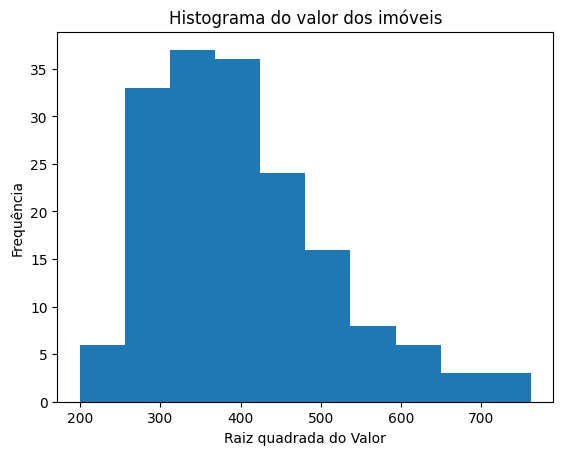

In [18]:
plt.hist(dados.raiz_valor, bins=10)

plt.xlabel('Raiz quadrada do Valor')
plt.ylabel('Frequência')
plt.title('Histograma do valor dos imóveis')

plt.show()

## Boxplots

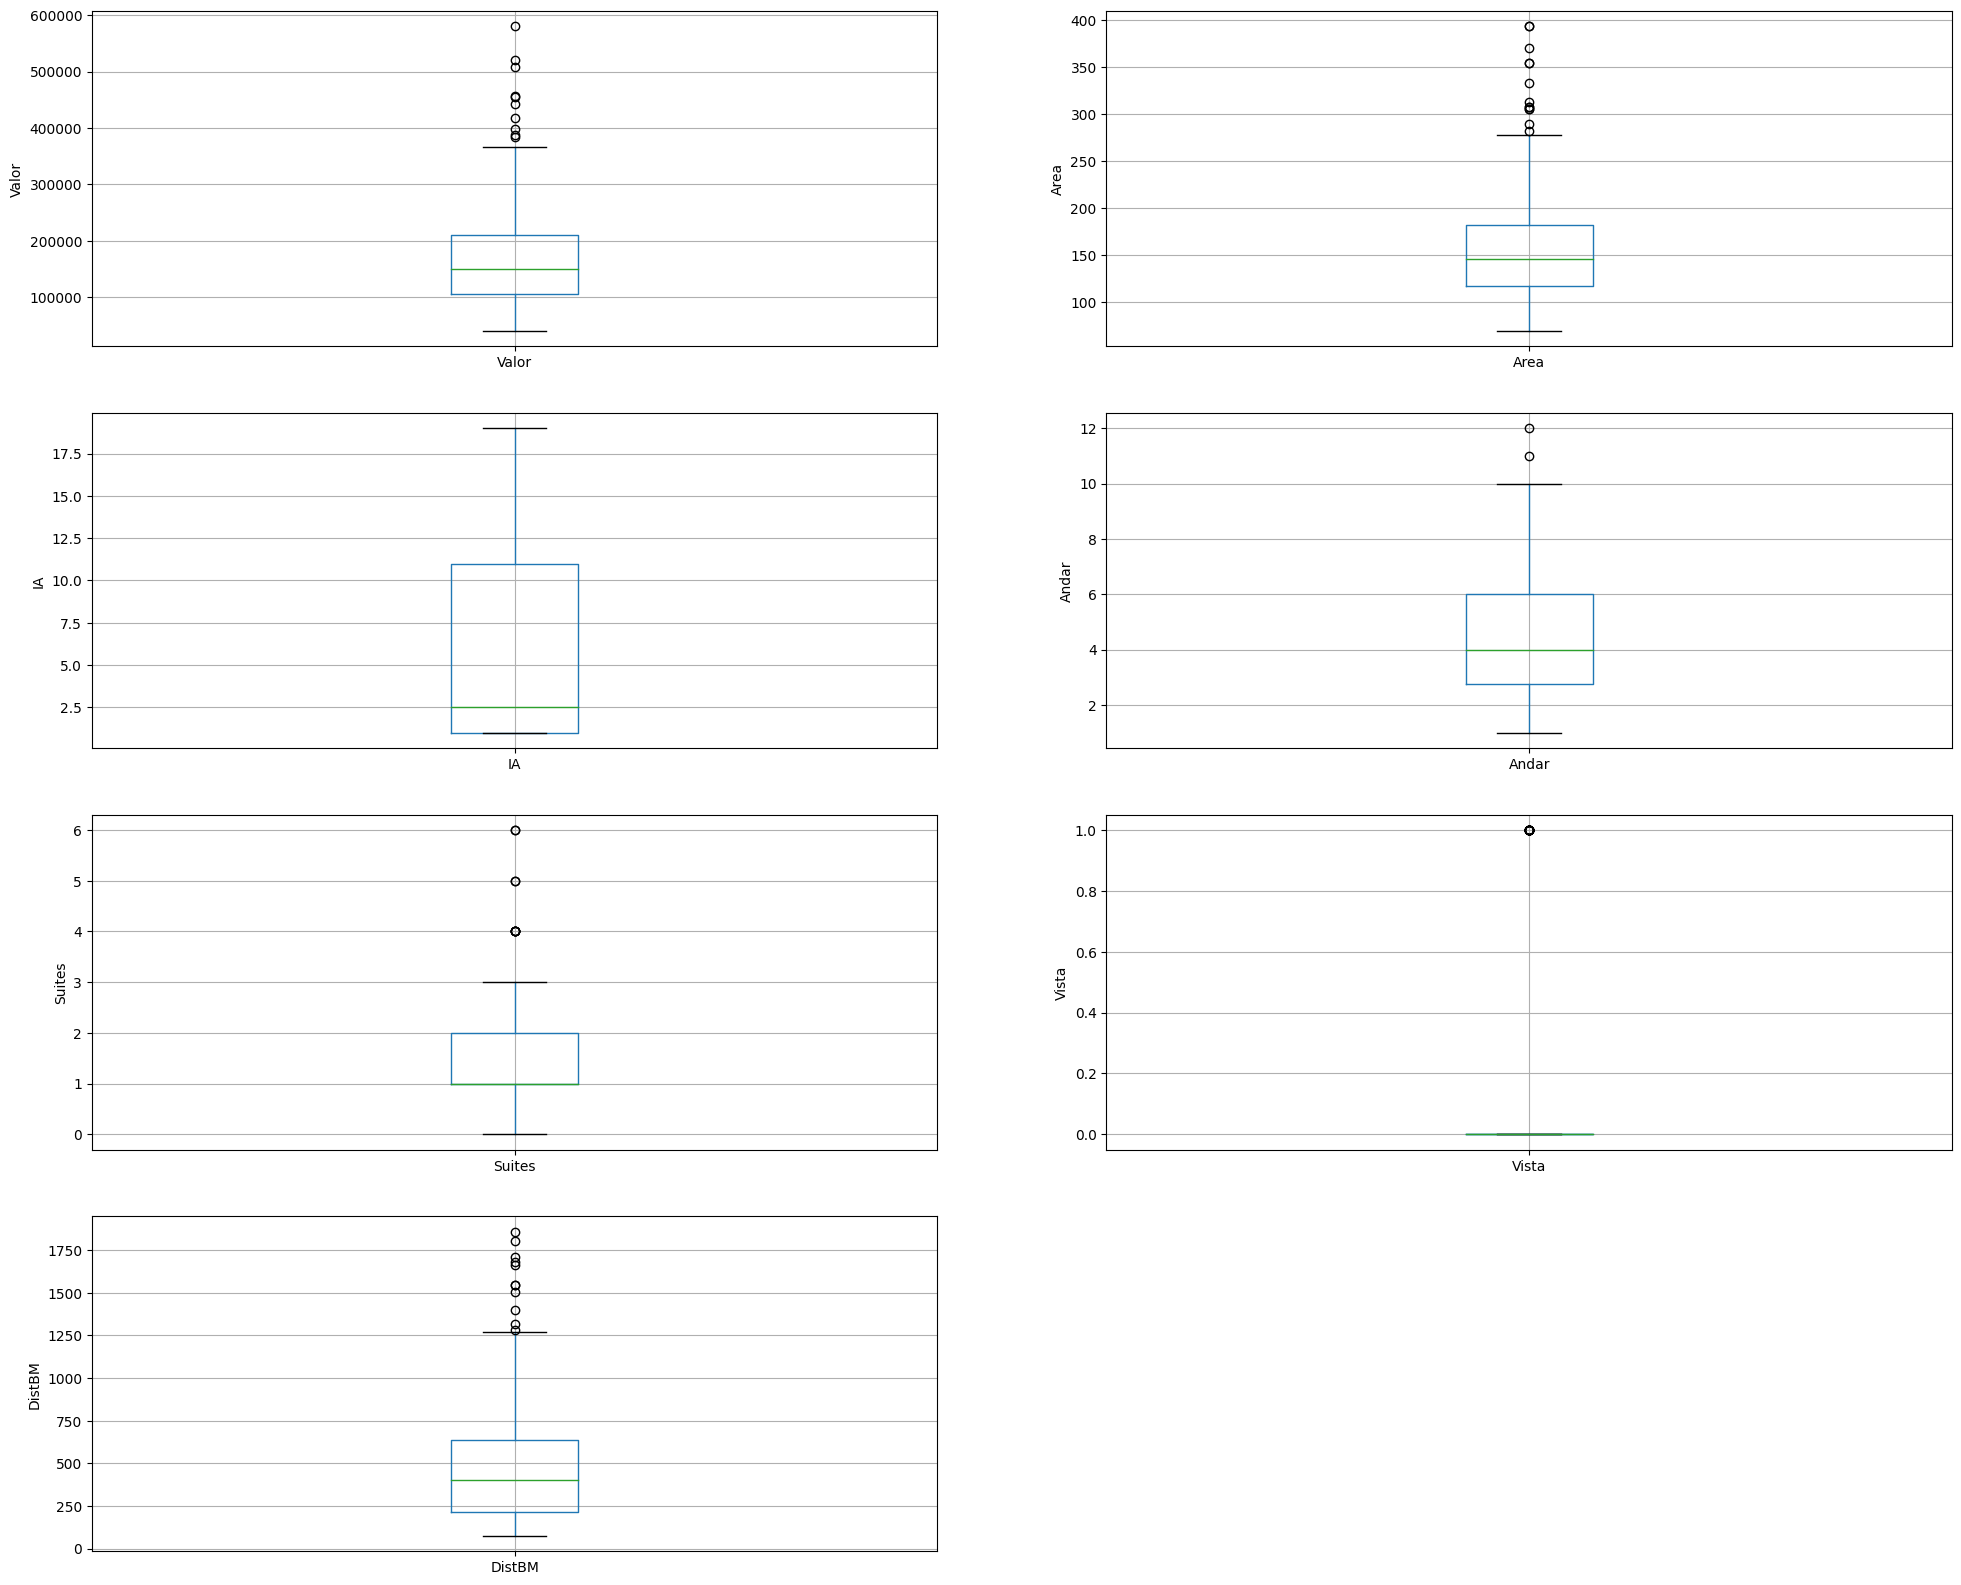

In [34]:
plt.figure(figsize=(24,20))

for i in range(len(dados.columns))[1:8]:
    plt.subplot(4, 2, i)
    fig = dados.boxplot(column=dados.columns[i])
    fig.set_title('')
    fig.set_ylabel(dados.columns[i])

## Matriz de correlação

In [35]:
corr_matrix = dados.corr().round(2)

corr_matrix

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
Ordem,1.00,0.34,-0.15,0.01,0.02,0.26,0.15,0.05,0.01,-0.01,0.36
Valor,0.34,1.00,0.77,-0.33,0.31,0.72,0.27,-0.05,0.22,0.37,0.99
Area,-0.15,0.77,1.00,-0.15,0.16,0.53,0.09,-0.12,0.11,0.30,0.77
IA,0.01,-0.33,-0.15,1.00,-0.38,-0.32,-0.01,-0.01,-0.14,-0.14,-0.35
Andar,0.02,0.31,0.16,-0.38,1.00,0.23,0.01,0.25,0.02,0.22,0.33
Suites,0.26,0.72,0.53,-0.32,0.23,1.00,0.04,-0.11,0.12,0.25,0.73
Vista,0.15,0.27,0.09,-0.01,0.01,0.04,1.00,-0.10,0.04,0.34,0.25
DistBM,0.05,-0.05,-0.12,-0.01,0.25,-0.11,-0.10,1.00,0.40,-0.10,-0.05
Semruido,0.01,0.22,0.11,-0.14,0.02,0.12,0.04,0.40,1.00,0.23,0.20
AV100m,-0.01,0.37,0.30,-0.14,0.22,0.25,0.34,-0.10,0.23,1.00,0.36


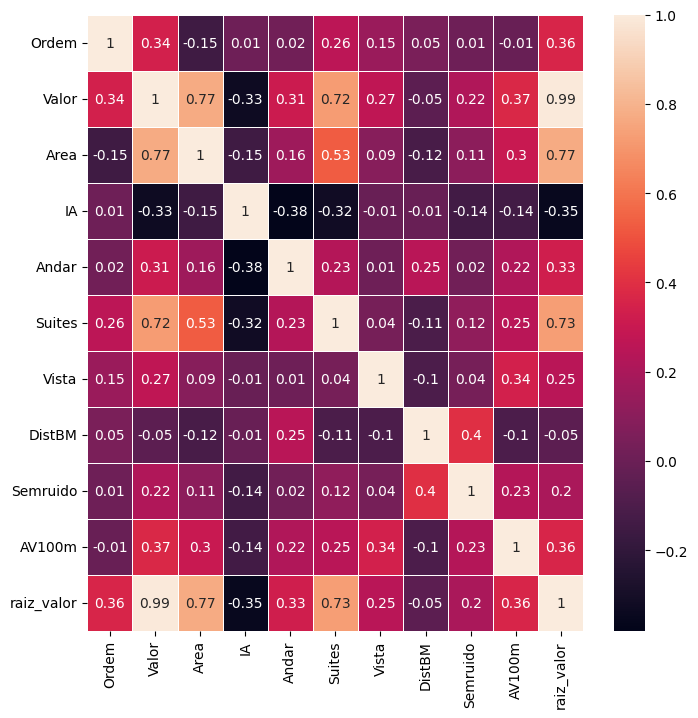

In [37]:
fig,ax = plt.subplots(figsize=(8,8))

sns.heatmap(data=corr_matrix, annot=True, linewidths=0.4, ax=ax)

plt.show()

## Scatterplot

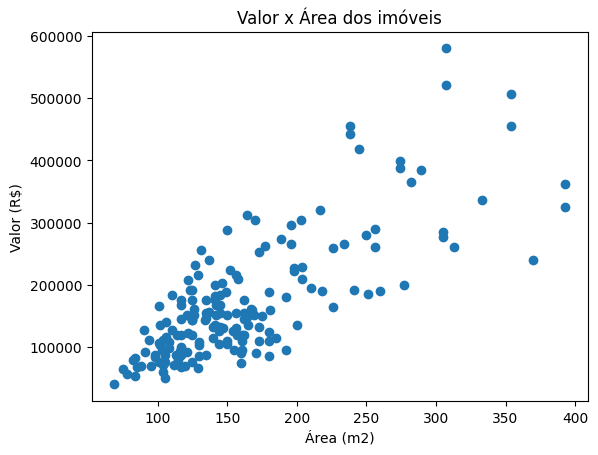

In [40]:
plt.scatter('Area','Valor',data=dados)

plt.ylabel('Valor (R$)')
plt.xlabel('Área (m2)')
plt.title('Valor x Área dos imóveis')

plt.show()

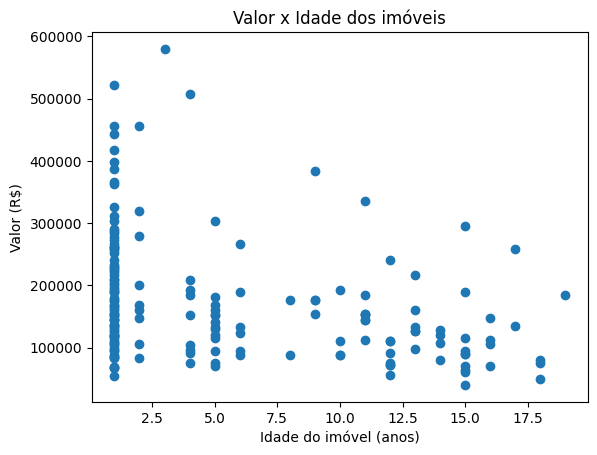

In [41]:
plt.scatter('IA','Valor',data=dados)

plt.ylabel('Valor (R$)')
plt.xlabel('Idade do imóvel (anos)')
plt.title('Valor x Idade dos imóveis')

plt.show()

## Boxplot variáveis qualitativas

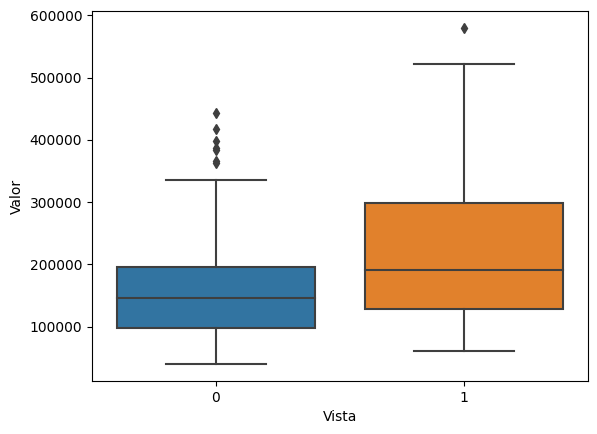

In [42]:
sns.boxplot(x='Vista',y='Valor', data=dados)

plt.show()

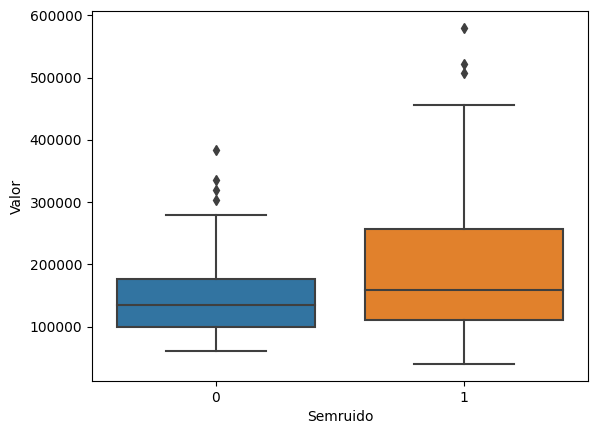

In [44]:
sns.boxplot(x='Semruido',y='Valor', data=dados)

plt.show()

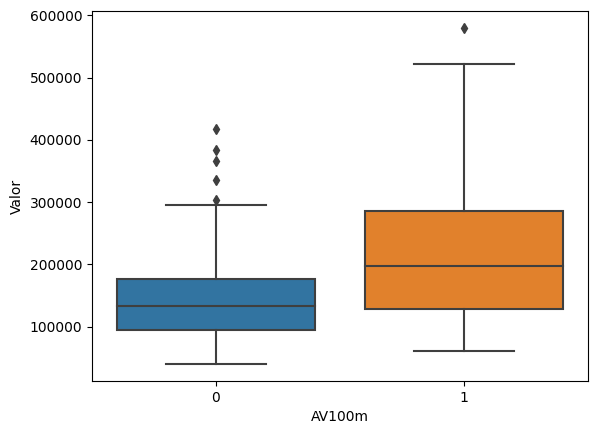

In [45]:
sns.boxplot(x='AV100m',y='Valor', data=dados)

plt.show()

# Criação de modelos

## LinearRegression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [62]:
x = dados[['Area','Suites','IA','Semruido','AV100m','Vista','Andar','DistBM']]
y = dados['Valor']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.15, random_state=101)

In [71]:
lr.fit(X_train, Y_train)

LinearRegression()

In [72]:
y_pred = lr.predict(X_test)

print(y_pred[:10])
print(Y_test[:10])

[233608.24276252  39400.1422109  366224.9243229   85600.86731213
 336442.69272384 177884.90807196  45071.00941799 141191.4719063
 264065.46061863 110591.71971365]
34     190000
124     70000
37     240000
65      83200
123    336000
41     124972
122    112000
55     131039
53     260536
94     154000
Name: Valor, dtype: int64


### Ponto de interceptação eixo Y

In [73]:
print(f'Intercepto: {lr.intercept_}')

Intercepto: -39375.304783741565


### Coeficientes de cada variável

In [74]:
coefs = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefs.columns = ['column',' coef']

coefs

,column,coef
0,Area,836.025361
1,Suites,33932.694002
2,IA,-1251.641716
3,Semruido,16093.374066
4,AV100m,-7118.919782
5,Vista,62478.089373
6,Andar,4998.569486
7,DistBM,-3.255967


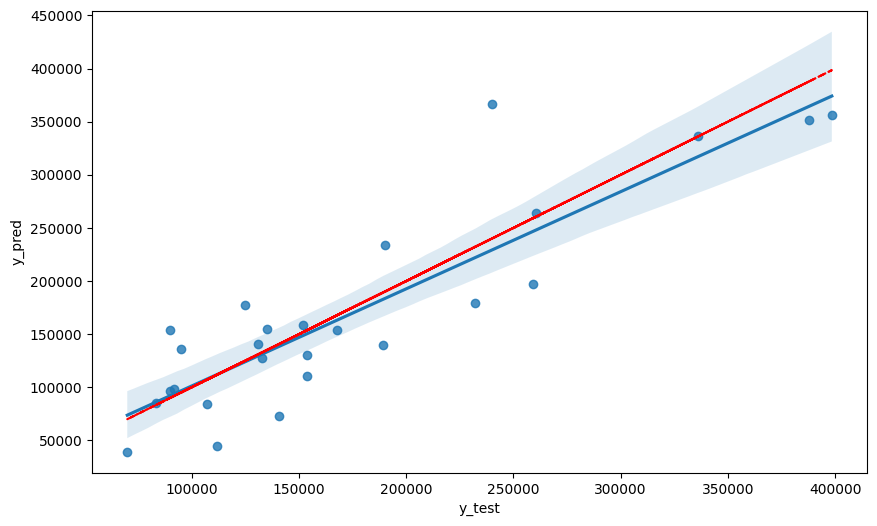

In [76]:
fig = plt.figure(figsize=(10, 6))

ax = sns.regplot(x=Y_test, y=y_pred)
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

plt.plot(Y_test, Y_test, '--r')

plt.show()

## Avaliando erro do modelo

In [81]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [83]:
MAE = round(mean_absolute_error(Y_test, y_pred),2)
MSE = round(mean_squared_error(Y_test, y_pred), 2)
R2 = round(r2_score(Y_test, y_pred), 2)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'R2: {R2}')

MAE: 34648.03
MSE: 2013867678.94
R2: 0.75


## DecisionTreeRegressor

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
dt_reg = DecisionTreeRegressor(random_state=101, max_depth=10)

In [92]:
dt_reg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [93]:
y_pred_dt = dt_reg.predict(X_test)

In [94]:
y_pred_dt

array([185000.        ,  60000.        , 185000.        ,  53600.        ,
       185000.        , 160000.        ,  60000.        , 109666.66666667,
       289920.        , 147000.        , 136000.        , 192000.        ,
        85000.        , 124530.88888889,  91333.33333333, 110000.        ,
       126000.        , 365750.        , 109666.66666667, 156000.        ,
       109666.66666667, 133000.        , 154000.        , 365750.        ,
       192000.        ,  95000.        ])

In [95]:
MAE = round(mean_absolute_error(Y_test, y_pred_dt),2)
MSE = round(mean_squared_error(Y_test, y_pred_dt), 2)
R2 = round(r2_score(Y_test, y_pred_dt), 2)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'R2: {R2}')

MAE: 39706.99
MSE: 2601488723.13
R2: 0.68


In [99]:
dt_reg.decision_path.

<bound method BaseDecisionTree.decision_path of DecisionTreeRegressor(max_depth=10, random_state=101)>

## SupportVectorRegression

In [100]:
from sklearn.svm import SVR

In [101]:
svr = SVR(kernel='linear')

In [102]:
svr.fit(X_train, Y_train)

SVR(kernel='linear')

In [104]:
y_pred_svr = svr.predict(X_test)

In [105]:
MAE = round(mean_absolute_error(Y_test, y_pred_svr),2)
MSE = round(mean_squared_error(Y_test, y_pred_svr), 2)
R2 = round(r2_score(Y_test, y_pred_svr), 2)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'R2: {R2}')

MAE: 43759.52
MSE: 3319394603.33
R2: 0.59
